In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
# Load the dataset
data = pd.read_csv('/Users/yubinbaaniya/Library/CloudStorage/Box-Box/master thesis and what not/Thesis/Analysis files/USE THIS FOR RESULT SECTION_3.csv')
data

,model_id,latitude,longitude,Data_Source,Folder,name,River,elevation_m,state,county,...,nse_QM,pearson_r_QM,r_squared_QM,kge_QM,nrmse_mean_QM,std_obs_QM,mean_obs_QM,clstr_id_2nd,gauge_id,reason
0,110099693,-17.570833,36.691667,GRDC,Africa,NICUADALA CAMPO (58279004),RIO LICUARE,13.0,Zambezia,GRDC,...,0.296325,0.587801,0.345510,0.310299,1.909436,38.976833,17.121489,2,grdc_1889200,nearest_cluster_2
1,110149488,-15.283333,35.383333,GRDC,Africa,DOMASI TT COLLEGE (65283003),DOMASI RIVER,793.0,Zomba,GRDC,...,-0.493462,0.151682,0.023007,0.146179,4.194696,17.283216,5.034571,4,grdc_1988130,nearest_cluster_4
2,110206983,-6.700000,37.916667,GRDC,Africa,KONGA (55223209),NGERENGERE,432.0,Morogoro,GRDC,...,-0.568603,0.179199,0.032112,-0.531640,2.107475,1.651243,0.981268,4,grdc_1289470,nearest_cluster_4
3,110207080,-10.333333,39.252778,GRDC,Africa,NYANGAO (55244002),NYANGAO,191.0,Lindi,GRDC,...,-0.926454,0.245004,0.060027,0.219817,0.889513,0.360199,0.561992,2,grdc_1289120,nearest_cluster_2
4,110220341,-15.488611,35.477778,GRDC,Africa,JALI (65282022),NTONDWE RIVER,675.0,Zomba,GRDC,...,-0.330657,0.219432,0.048150,0.173106,3.749721,6.605058,2.031792,6,grdc_1988140,nearest_cluster_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,780108185,18.392083,-77.964583,GRDC,Central_America,LETHE,GREAT RIVER,99.0,Saint James,GRDC,...,-0.026842,0.514227,0.264430,0.406474,1.124040,12.679811,11.430720,0,grdc_4584100,nearest_cluster_0
19186,780108571,18.343840,-66.236279,USA,North_America,RIO DE LA PLATA BLW LA PLATA DAMSITE - PR,RIO DE LA PLATA,31.0,Puerto Rico,USGS,...,-1.201017,0.254348,0.064693,-1.355308,14.792151,59.923866,6.009827,0,usa_50045010,regulatory
19187,780110105,18.412447,-66.714064,USA,North_America,RIO TANAMA AT CHARCO HONDO - PR,RIO TANAMA,27.0,Puerto Rico,USGS,...,-0.322305,0.498974,0.248975,-0.403707,1.257294,3.341007,3.055570,0,usa_50028400,nearest_cluster_0
19188,780112793,18.392447,-67.150736,USA,North_America,RIO CULEBRINAS AT MARGARITA DAMSITE NR AGUADA ...,RIO CULEBRINAS,11.0,Puerto Rico,USGS,...,-0.440729,0.435209,0.189407,-0.122446,1.936129,16.941228,10.502101,0,usa_50148890,near_gauge


In [4]:
data.columns

Index(['model_id', 'latitude', 'longitude', 'Data_Source', 'Folder', 'name',
       'River', 'elevation_m', 'state', 'county', 'country_name', 'COMID_v2',
       'isVisible', 'GEOGloWS_v2_vpu', 'matching_column', 'climate',
       'strmOrder', 'DSContArea(km2)', 'clstr_id_1st', 'byu_id', 'me_sim',
       'mae_sim', 'rmse_sim', 'nse_sim', 'kge_sim', 'me_SFDC', 'mae_SFDC',
       'rmse_SFDC', 'nse_SFDC', 'kge_SFDC', 'nrmse_SFDC', 'pearson_r_SFDC',
       'r2_SFDC', 'asgn_reach_id_y', 'me_QM', 'rmse_QM', 'mae_QM', 'nse_QM',
       'pearson_r_QM', 'r_squared_QM', 'kge_QM', 'nrmse_mean_QM', 'std_obs_QM',
       'mean_obs_QM', 'clstr_id_2nd', 'gauge_id', 'reason'],
      dtype='object')

GV2: 34.5%, BC: 3.7%, SABER: 9.2%


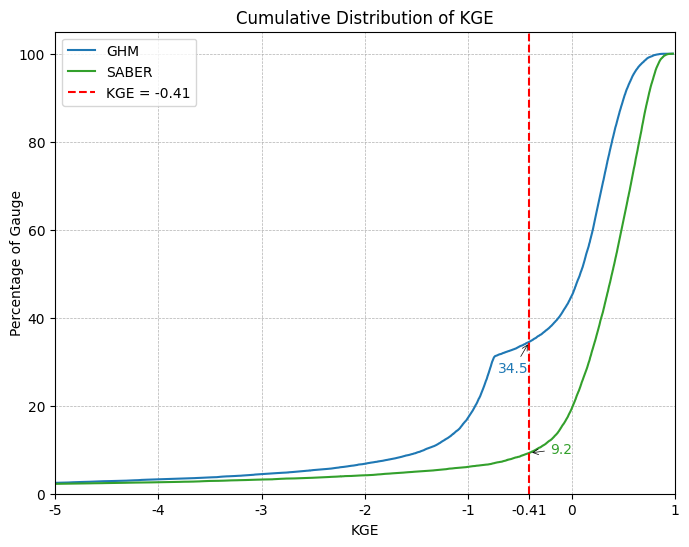

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the dataset
data = pd.read_csv('/Users/yubinbaaniya/Library/CloudStorage/Box-Box/master thesis and what not/Thesis/Analysis files/USE THIS FOR RESULT SECTION_3.csv')

# Extract the KGE columns
kge_v2 = data['kge_sim'].dropna()
kge_bc = data['kge_QM'].dropna()
kge_saber = data['kge_SFDC'].dropna()

# Function to calculate cumulative distribution
def calculate_cumulative_distribution(series):
    counts = series.value_counts().sort_index()  # Sort by index to ensure proper cumulative calculation
    cumulative_counts = counts.cumsum()
    cumulative_distribution = cumulative_counts / len(series)
    return cumulative_distribution

# Calculate cumulative distributions
cumulative_distribution_v2 = calculate_cumulative_distribution(kge_v2)
cumulative_distribution_bc = calculate_cumulative_distribution(kge_bc)
cumulative_distribution_saber = calculate_cumulative_distribution(kge_saber)

# Ensure all distributions are aligned to the same index, including -0.41
x_value = -0.41
common_index = cumulative_distribution_v2.index.union(
   cumulative_distribution_bc.index).union(cumulative_distribution_saber.index).union(pd.Index([x_value]))

# Reindex with interpolation to fill gaps, including -0.41
cumulative_distribution_v2 = cumulative_distribution_v2.reindex(common_index).interpolate()
cumulative_distribution_bc = cumulative_distribution_bc.reindex(common_index).interpolate()
cumulative_distribution_saber = cumulative_distribution_saber.reindex(common_index).interpolate()

# Interpolate y-values at x = -0.41 for each line
y_v2 = cumulative_distribution_v2.loc[x_value]
y_bc = cumulative_distribution_bc.loc[x_value]
y_saber = cumulative_distribution_saber.loc[x_value]

# Print interpolated values
print(f"GV2: {y_v2*100:.1f}%, BC: {y_bc*100:.1f}%, SABER: {y_saber*100:.1f}%")

# Plotting the cumulative distributions
plt.figure(figsize=(8, 6))

plt.plot(cumulative_distribution_v2.index, cumulative_distribution_v2, label='GHM', color='#1f78b4')
plt.plot(cumulative_distribution_saber.index, cumulative_distribution_saber, label='SABER', color='#33a02c')
#plt.plot(cumulative_distribution_bc.index, cumulative_distribution_bc, label='MFDC-QM', color='#7b3294')


plt.ylabel('Percentage of Gauge')
plt.gca().yaxis.set_label_coords(-0.05, 0.5)
plt.xlabel('KGE')
plt.title('Cumulative Distribution of KGE')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Add the vertical line at x = -0.41
plt.axvline(x=-0.41, color='r', linestyle='--', label='KGE = -0.41')
plt.legend()

# Add annotations with arrows
plt.annotate(f'{y_v2*100:.1f}', xy=(x_value, y_v2), xytext=(x_value - 0.3, y_v2 - 0.07),
             arrowprops=dict(arrowstyle='->', lw=0.5), color='#1f78b4')
# plt.annotate(f'{y_bc*100:.1f}', xy=(x_value, y_bc), xytext=(x_value + 0.2, y_bc-0.01),
#              arrowprops=dict(arrowstyle='->', lw=0.5), color='#7b3294')
plt.annotate(f'{y_saber*100:.1f}', xy=(x_value, y_saber), xytext=(x_value + 0.2, y_saber),
             arrowprops=dict(arrowstyle='->', lw=0.5), color='#33a02c')

# Set the x-axis limits to include the -0.41 and adjust accordingly
plt.xlim(left=-5, right=1)
plt.ylim(bottom=0, top=1.05)

# Add custom ticks including -0.41 explicitly
current_ticks = plt.xticks()[0]
new_ticks = sorted(set(current_ticks).union([x_value]))
plt.xticks(new_ticks)

# Format x-axis ticks to display as integers where applicable
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}' if x.is_integer() else f'{x:.2f}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}'))

# Optional: Save the plot
plt.savefig('/Users/yubinbaaniya/Library/CloudStorage/Box-Box/master thesis and what not/Thesis/plot/KGE_cumulative_plot_rfs_and_saber.png', dpi=1800, bbox_inches='tight')

plt.show()

In [ ]:
import seaborn as sns

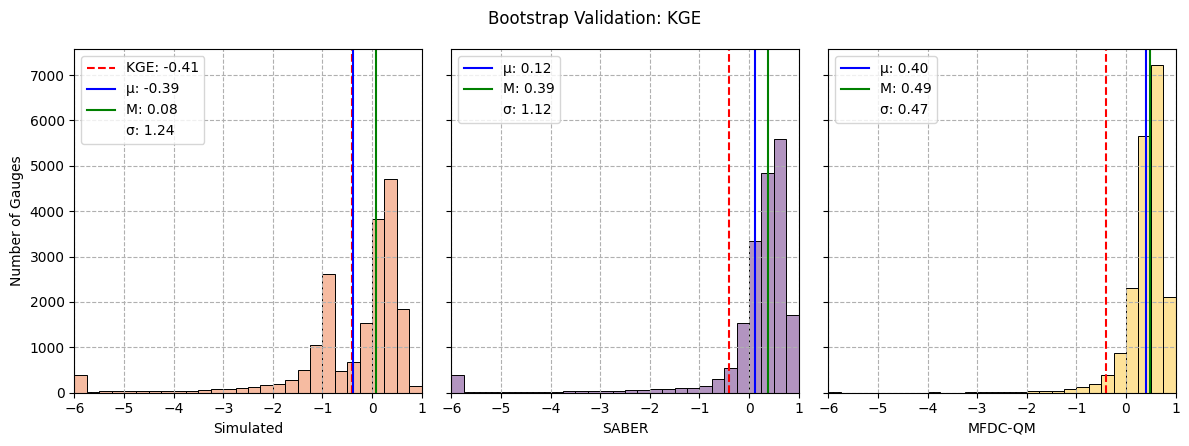

In [44]:
for stat in ['kge']:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4.5),tight_layout=True, sharey=True)

    if stat == 'kge':
        binwidth = 0.25
        binrange = (-6, 1)
        ax1.axvline(-0.41, c='red', linestyle='--', label='KGE: -0.41')
        ax2.axvline(-0.41, c='red', linestyle='--')
        ax3.axvline(-0.41, c='red', linestyle='--')

    else:
        raise ValueError(f'Invalid statistic: {stat}')

    # Set plot titles and grid
    fig.suptitle(f'Bootstrap Validation: {stat.upper()}')
    for ax in (ax1, ax2, ax3):
        ax.grid(True, 'both', zorder=0, linestyle='--')
        ax.set_xlim(binrange)

    # Extract the relevant data and ensure it is numeric
    stat_df = data[[f'{stat}_SFDC', f'{stat}_sim', f'{stat}_QM']].copy()
    stat_df = stat_df.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing invalid values to NaN

    # Clip values to the bin range
    stat_df = stat_df.clip(lower=binrange[0], upper=binrange[1])

    # Calculate mean, median, and standard deviation for each column
    stats = {}
    for column in [f'{stat}_sim', f'{stat}_SFDC', f'{stat}_QM']:
        stats[column] = {
            'mean': stat_df[column].mean(),
            'median': stat_df[column].median(),
            'std': stat_df[column].std()
        }

    # Plot histograms with labels including mean, median, and standard deviation
    sns.histplot(stat_df, x=f'{stat}_sim', binwidth=binwidth, binrange=binrange, ax=ax1, color='#f4a582')
    sns.histplot(stat_df, x=f'{stat}_SFDC', binwidth=binwidth, binrange=binrange, ax=ax2, color='#9970ab')
    sns.histplot(stat_df, x=f'{stat}_QM', binwidth=binwidth, binrange=binrange, ax=ax3, color='#fed976')

    # Plot mean and median as vertical lines
    for ax, col, color in zip([ax1, ax2, ax3], [f'{stat}_sim', f'{stat}_SFDC', f'{stat}_QM'], ['#f4a582', '#9970ab', '#fed976']):
        ax.axvline(stats[col]['mean'], c='blue', label=f'μ: {stats[col]["mean"]:.2f}')
        ax.axvline(stats[col]['median'], c='green', label=f'M: {stats[col]["median"]:.2f}')

    # Add legends
    legend_position = 'upper left'
    for ax, col in zip([ax1, ax2, ax3], [f'{stat}_sim', f'{stat}_SFDC', f'{stat}_QM']):
        dummy_artist = plt.Line2D([0], [0], color='none', label=f'σ: {stats[col]["std"]:.2f}')
        ax.legend(handles=ax.get_legend_handles_labels()[0] + [dummy_artist], loc=legend_position)

    # Set axis labels
    ax1.set_xlabel(f'Simulated')
    ax2.set_xlabel(f'SABER')
    ax3.set_xlabel(f'MFDC-QM')
    ax1.set_ylabel('Number of Gauges')
    ax2.set_ylabel('Number of Gauges')
    ax3.set_ylabel('Number of Gauges')
    plt.savefig('/Users/yubin/Library/CloudStorage/Box-Box/master thesis and what not/Thesis/plot/KGE ALL THREE HISTOGRAM.png', dpi=1800, bbox_inches='tight')
    plt.show(fig)


In [39]:
KGE_values = data['kge_sim'].dropna()

In [40]:
KGE_values

0        0.456278
1       -0.218665
2       -0.635313
3       -1.345134
4       -0.088410
           ...   
19185    0.001797
19186   -0.224735
19187   -0.977600
19188   -0.332468
19189   -0.134923
Name: kge_sim, Length: 19190, dtype: float64

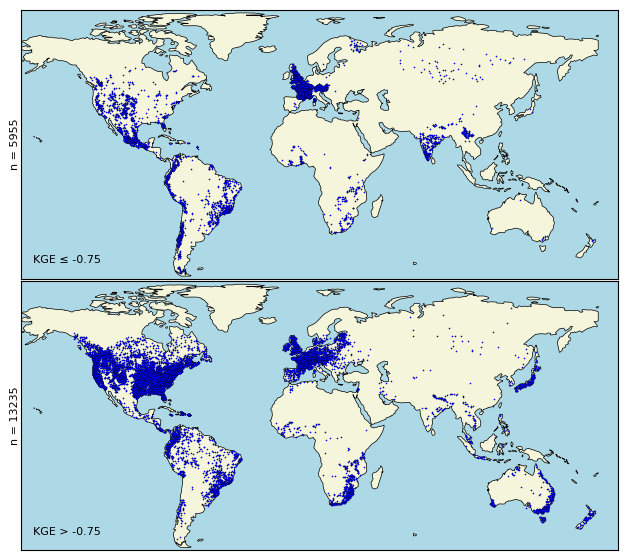

In [39]:
import geopandas as gpd
from pyproj import Proj, Transformer
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box
import pandas as pd

# Load the shapefile
shapefile_path = '/Users/yubin/Library/CloudStorage/Box-Box/master thesis and what not/Geoglows V2 paper/Shapefile/simplified_continent_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Load and process data
data = pd.read_csv('/Users/yubin/Library/CloudStorage/Box-Box/master thesis and what not/Thesis/Analysis files/USE THIS FOR RESULT SECTION_3.csv')

# Split data based on KGE threshold
data_poor = data[data['kge_sim'] <= -0.75]
data_other = data[data['kge_sim'] > -0.75]

antarctica_box = box(-168, -55, 180, 90)
bbox_antarctica = gpd.GeoDataFrame(geometry=[antarctica_box], crs='EPSG:4326')

# Clip Antarctica
bbox_antarctica = bbox_antarctica.to_crs(gdf.crs)
world = gpd.clip(gdf, bbox_antarctica)

# 4326 to Patterson projection
wgs84 = Proj(proj='latlong', datum='WGS84')
patterson = Proj(proj='patterson', lon_0=12)
transformer = Transformer.from_proj(wgs84, patterson)

# Transform the world shapefile coordinates to the Patterson projection
world = world.to_crs(patterson.srs)

# Create 2 subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.01, top=0.95, bottom=0.05)

# Function to plot each subset of data using the transformer
def plot_data(ax, data, label, axis):
    x, y = transformer.transform(data['longitude'].values, data['latitude'].values)
    ax.scatter(x, y, color='blue', s=1, edgecolor='black', linewidth=0.1)
    ax.text(0.02, 0.05, label, va='bottom', ha='left', transform=ax.transAxes, fontsize=8)
    ax.text(-0.001, 0.5, axis, va='center', ha='right', rotation='vertical', transform=ax.transAxes, fontsize=8)

# Plot each subset
for ax, (data_subset, label) in zip(axs, [
    (data_poor, "KGE ≤ -0.75"),
    (data_other, "KGE > -0.75")
]):
    # Set bluish color outside the shapefile
    ax.set_facecolor('lightblue')
    world.plot(ax=ax, color='beige', edgecolor='black', linewidth=0.5)
    plot_data(ax, data_subset, label, f"n = {len(data_subset)}")
    ax.set_xlim([-2e7, 2e7])
    ax.set_ylim([-0.7e7, 1.1e7])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Set the overall title
#plt.suptitle('Distribution of KGE Values', fontsize=12, x=0.5, y=0.972, ha='center', va='top')
plt.savefig('/Users/yubin/Library/CloudStorage/Box-Box/master thesis and what not/Thesis/plot/Kge<>-0.75.png', dpi=1800, bbox_inches='tight')  
plt.show()

In [10]:
data_poor.to_csv('/Users/yubin/Downloads/data_poor_with_kge<-0.75.csv', index=False)


Summary Statistics for Each Climate Zone:

Poor Performance (KGE ≤ -0.75):
            mean_obs_QM                  kge_sim       
                  count     mean  median    mean median
climate                                                
Arid                935   40.269   2.174  -5.031 -1.720
Continental         521   45.296   1.822 -15.475 -1.426
Polar                20   26.003   2.615 -11.551 -1.658
Temperate          3487   25.608   1.971  -2.171 -0.940
Tropical            987  143.466  16.569  -3.861 -1.239

Good Performance (KGE > -0.75):
            mean_obs_QM                   kge_sim       
                  count      mean  median    mean median
climate                                                 
Arid               1582    39.921   3.373   0.106  0.126
Continental        4248    83.155   6.863   0.257  0.277
Polar                18    51.978   2.734   0.012  0.109
Temperate          6027    93.795   6.483   0.224  0.277
Tropical           1354  1291.839  66.965   

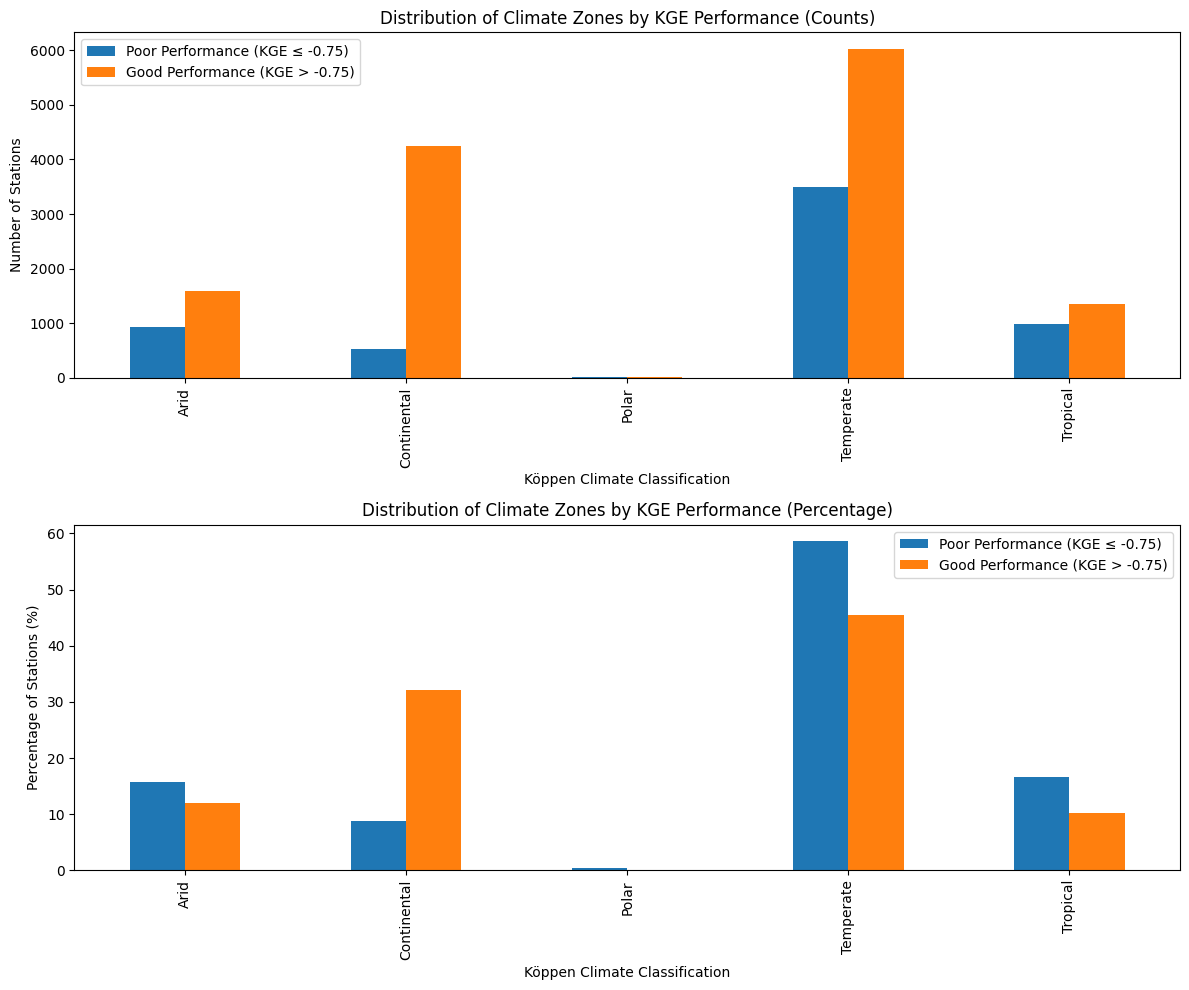

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('/Users/yubin/Downloads/updated_analysis_file.xlsx')
# Split data based on KGE threshold as before
data_poor = data[data['kge_sim'] <= -0.75]
data_other = data[data['kge_sim'] > -0.75]

# Analysis for climate patterns
def analyze_climate_patterns(data_poor, data_other):
    # Calculate counts and percentages for each climate type
    climate_poor = data_poor['climate'].value_counts()
    climate_good = data_other['climate'].value_counts()
    
    # Create a DataFrame for plotting
    climate_df = pd.DataFrame({
        'Poor Performance (KGE ≤ -0.75)': climate_poor,
        'Good Performance (KGE > -0.75)': climate_good
    }).fillna(0)
    
    # Calculate percentages
    climate_pct = climate_df.div(climate_df.sum()) * 100
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot raw counts
    climate_df.plot(kind='bar', ax=ax1)
    ax1.set_title('Distribution of Climate Zones by KGE Performance (Counts)')
    ax1.set_xlabel('Köppen Climate Classification')
    ax1.set_ylabel('Number of Stations')
    ax1.legend()
    
    # Plot percentages
    climate_pct.plot(kind='bar', ax=ax2)
    ax2.set_title('Distribution of Climate Zones by KGE Performance (Percentage)')
    ax2.set_xlabel('Köppen Climate Classification')
    ax2.set_ylabel('Percentage of Stations (%)')
    ax2.legend()
    
    plt.tight_layout()
    
    # Print summary statistics
    print("\nSummary Statistics for Each Climate Zone:")
    print("\nPoor Performance (KGE ≤ -0.75):")
    poor_stats = data_poor.groupby('climate').agg({
        'mean_obs_QM': ['count', 'mean', 'median'],
        'kge_sim': ['mean', 'median']
    }).round(3)
    print(poor_stats)
    
    print("\nGood Performance (KGE > -0.75):")
    good_stats = data_other.groupby('climate').agg({
        'mean_obs_QM': ['count', 'mean', 'median'],
        'kge_sim': ['mean', 'median']
    }).round(3)
    print(good_stats)
    
    return climate_df, climate_pct

# Run the analysis
climate_counts, climate_percentages = analyze_climate_patterns(data_poor, data_other)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



Summary Statistics:

Poor Performance (KGE ≤ -0.75)
        strmOrder  DSContArea(km2)  elevation_m  mean_obs_QM
count     5951.00              NaN          NaN          NaN
mean         3.72          9140.89       867.15        49.34
median       4.00           428.66       614.00         2.43

Stream Order Distribution for Poor Performance (KGE ≤ -0.75):
strmOrder
1.0        8
2.0     1140
3.0     1777
4.0     1545
5.0      832
6.0      455
7.0      142
8.0       35
9.0       14
10.0       3
Name: count, dtype: int64

Good Performance (KGE > -0.75)
        strmOrder  DSContArea(km2)  elevation_m  mean_obs_QM
count     13215.0              NaN          NaN          NaN
mean          4.0         12076.45       456.25       207.86
median        4.0           665.30       237.00         7.34

Stream Order Distribution for Good Performance (KGE > -0.75):
strmOrder
1.0        4
2.0     1575
3.0     3653
4.0     3674
5.0     2519
6.0     1233
7.0      406
8.0      103
9.0       45
10.0    

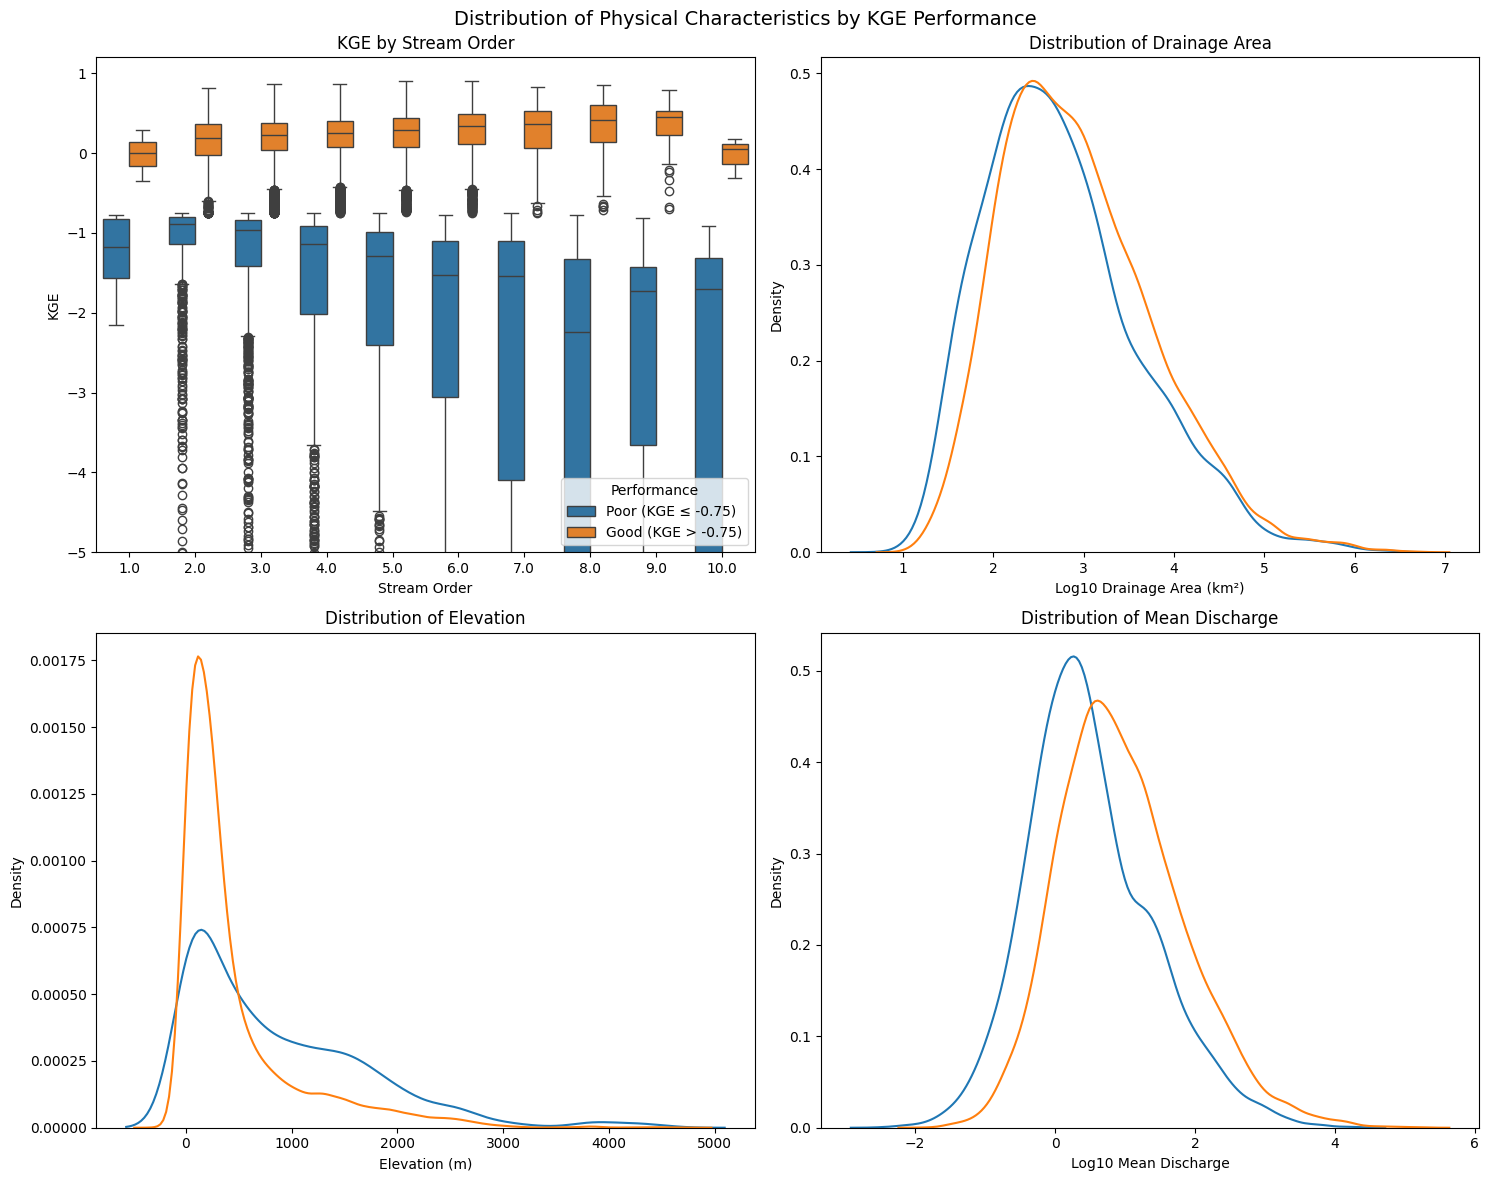


Top 10 Countries Summary:
                          Poor Performance (KGE ≤ -0.75)  \
country_name                                               
Australia                                            0.0   
Austria                                            128.0   
Brazil                                             439.0   
Canada                                             111.0   
Chile                                              319.0   
Colombia                                           134.0   
England                                            665.0   
France                                            1927.0   
Germany                                              0.0   
India                                              217.0   
Mexico                                             530.0   
South Africa                                         0.0   
United States of America                           630.0   

                          Good Performance (KGE > -0.75)  
country_name 

<Figure size 1500x600 with 0 Axes>

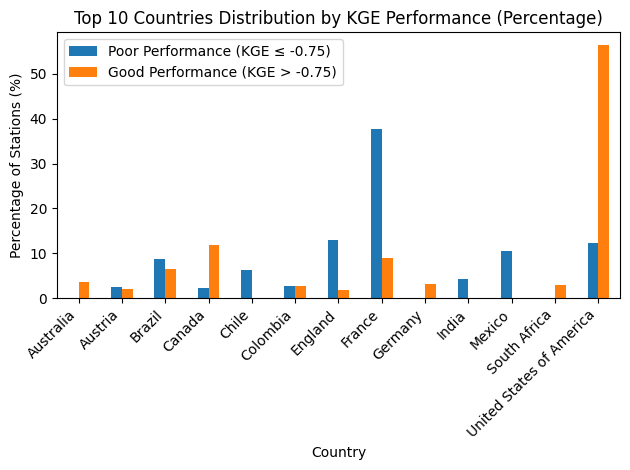

In [26]:
def analyze_physical_characteristics(data_poor, data_other):
    # Create figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Distribution of Physical Characteristics by KGE Performance', fontsize=14)
    
    # 1. Stream Order Analysis
    sns.boxplot(data=pd.concat([
        data_poor.assign(Performance='Poor (KGE ≤ -0.75)'),
        data_other.assign(Performance='Good (KGE > -0.75)')
    ]), x='strmOrder', y='kge_sim', hue='Performance', ax=axs[0,0])
    axs[0,0].set_title('KGE by Stream Order')
    axs[0,0].set_xlabel('Stream Order')
    axs[0,0].set_ylabel('KGE')
    axs[0,0].set_ylim(-5, 1.2)


    # 2. Drainage Area Analysis (log scale due to large range)
    for data, label in [(data_poor, 'Poor (KGE ≤ -0.75)'), (data_other, 'Good (KGE > -0.75)')]:
        sns.kdeplot(data=np.log10(data['DSContArea(km2)']), label=label, ax=axs[0,1])
    axs[0,1].set_title('Distribution of Drainage Area')
    axs[0,1].set_xlabel('Log10 Drainage Area (km²)')
    axs[0,1].set_ylabel('Density')

    # 3. Elevation Analysis
    for data, label in [(data_poor, 'Poor (KGE ≤ -0.75)'), (data_other, 'Good (KGE > -0.75)')]:
        sns.kdeplot(data=data['elevation_m'], label=label, ax=axs[1,0])
    axs[1,0].set_title('Distribution of Elevation')
    axs[1,0].set_xlabel('Elevation (m)')
    axs[1,0].set_ylabel('Density')

    # 4. Mean Discharge Analysis (log scale)
    for data, label in [(data_poor, 'Poor (KGE ≤ -0.75)'), (data_other, 'Good (KGE > -0.75)')]:
        sns.kdeplot(data=np.log10(data['mean_obs_QM']), label=label, ax=axs[1,1])
    axs[1,1].set_title('Distribution of Mean Discharge')
    axs[1,1].set_xlabel('Log10 Mean Discharge')
    axs[1,1].set_ylabel('Density')

    plt.tight_layout()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    for group_name, group_data in [('Poor Performance (KGE ≤ -0.75)', data_poor), 
                                 ('Good Performance (KGE > -0.75)', data_other)]:
        print(f"\n{group_name}")
        stats = group_data.agg({
            'strmOrder': ['count', 'mean', 'median'],
            'DSContArea(km2)': ['mean', 'median'],
            'elevation_m': ['mean', 'median'],
            'mean_obs_QM': ['mean', 'median']
        }).round(2)
        print(stats)
        
        # Stream order distribution
        print(f"\nStream Order Distribution for {group_name}:")
        print(group_data['strmOrder'].value_counts().sort_index())

# Run the analysis
analyze_physical_characteristics(data_poor, data_other)
plt.show()

# Additional analysis for country distribution
def analyze_country_distribution(data_poor, data_other):
    plt.figure(figsize=(15, 6))
    
    # Calculate country distributions
    country_poor = data_poor['country_name'].value_counts().head(10)
    country_good = data_other['country_name'].value_counts().head(10)
    
    # Create DataFrame for plotting
    country_df = pd.DataFrame({
        'Poor Performance (KGE ≤ -0.75)': country_poor,
        'Good Performance (KGE > -0.75)': country_good
    }).fillna(0)
    
    # Calculate percentages
    country_pct = country_df.div(country_df.sum()) * 100
    
    # Plot percentages
    country_pct.plot(kind='bar')
    plt.title('Top 10 Countries Distribution by KGE Performance (Percentage)')
    plt.xlabel('Country')
    plt.ylabel('Percentage of Stations (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    
    # Print summary
    print("\nTop 10 Countries Summary:")
    print(country_df)
    print("\nPercentages:")
    print(country_pct.round(2))

# Run country analysis
analyze_country_distribution(data_poor, data_other)
plt.show()

In [22]:
import openpyxl
import numpy as np


Elevation Distribution Summary:

Poor Performance:
Number of stations: 5955
Mean elevation: 867.2m
Median elevation: 614.0m

Good Performance:
Number of stations: 13235
Mean elevation: 456.2m
Median elevation: 237.0m

Drainage Area Distribution Summary:

Poor Performance:
Number of stations: 5955
Mean drainage area: 9140.9 km²
Median drainage area: 428.7 km²

Good Performance:
Number of stations: 13235
Mean drainage area: 12076.4 km²
Median drainage area: 665.3 km²


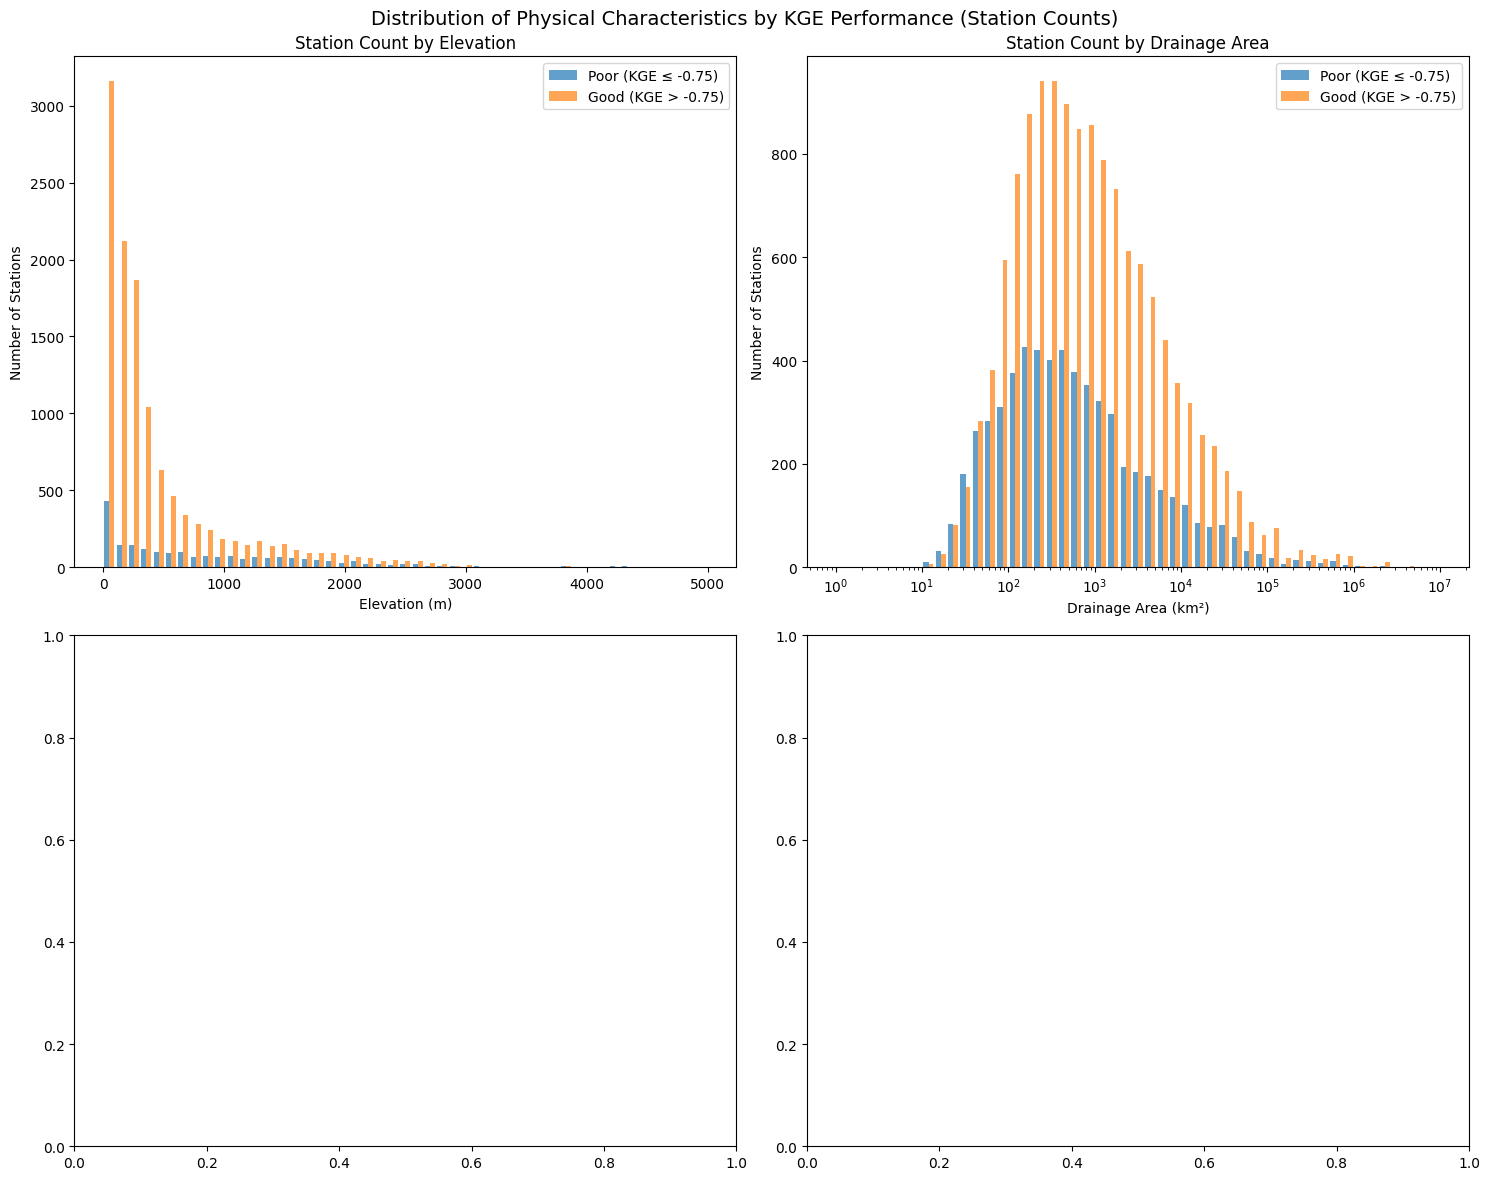

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Split data based on KGE threshold as before
data_poor = data[data['kge_sim'] <= -0.75]
data_other = data[data['kge_sim'] > -0.75]

def plot_station_distributions(data_poor, data_other):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Distribution of Physical Characteristics by KGE Performance (Station Counts)', fontsize=14)
    
    # Elevation Distribution
    bins = np.linspace(0, 5000, 50)  # 50 bins from 0 to 5000m
    ax1.hist([data_poor['elevation_m'], data_other['elevation_m']], 
             bins=bins, label=['Poor (KGE ≤ -0.75)', 'Good (KGE > -0.75)'],
             alpha=0.7)
    ax1.set_title('Station Count by Elevation')
    ax1.set_xlabel('Elevation (m)')
    ax1.set_ylabel('Number of Stations')
    ax1.legend()

    # Drainage Area Distribution (using log bins)
    log_bins = np.logspace(0, 7, 50)  # 50 bins from 10^0 to 10^7
    ax2.hist([data_poor['DSContArea(km2)'], data_other['DSContArea(km2)']],
             bins=log_bins, label=['Poor (KGE ≤ -0.75)', 'Good (KGE > -0.75)'],
             alpha=0.7)
    ax2.set_xscale('log')
    ax2.set_title('Station Count by Drainage Area')
    ax2.set_xlabel('Drainage Area (km²)')
    ax2.set_ylabel('Number of Stations')
    ax2.legend()

    # Print summary statistics
    print("\nElevation Distribution Summary:")
    for label, data in [('Poor Performance', data_poor), ('Good Performance', data_other)]:
        print(f"\n{label}:")
        print(f"Number of stations: {len(data)}")
        print(f"Mean elevation: {data['elevation_m'].mean():.1f}m")
        print(f"Median elevation: {data['elevation_m'].median():.1f}m")

    print("\nDrainage Area Distribution Summary:")
    for label, data in [('Poor Performance', data_poor), ('Good Performance', data_other)]:
        print(f"\n{label}:")
        print(f"Number of stations: {len(data)}")
        print(f"Mean drainage area: {data['DSContArea(km2)'].mean():.1f} km²")
        print(f"Median drainage area: {data['DSContArea(km2)'].median():.1f} km²")

    plt.tight_layout()
    plt.show()

# Run the analysis
plot_station_distributions(data_poor, data_other)


Distribution Summary:

Poor Performance:
Total number of stations: 5955
Elevation (m) - Mean: 867.2, Median: 614.0
Drainage Area (km²) - Mean: 9140.9, Median: 428.7
Mean Discharge (m³/s) - Mean: 49.3, Median: 2.4

Good Performance:
Total number of stations: 13235
Elevation (m) - Mean: 456.2, Median: 237.0
Drainage Area (km²) - Mean: 12076.4, Median: 665.3
Mean Discharge (m³/s) - Mean: 207.9, Median: 7.3


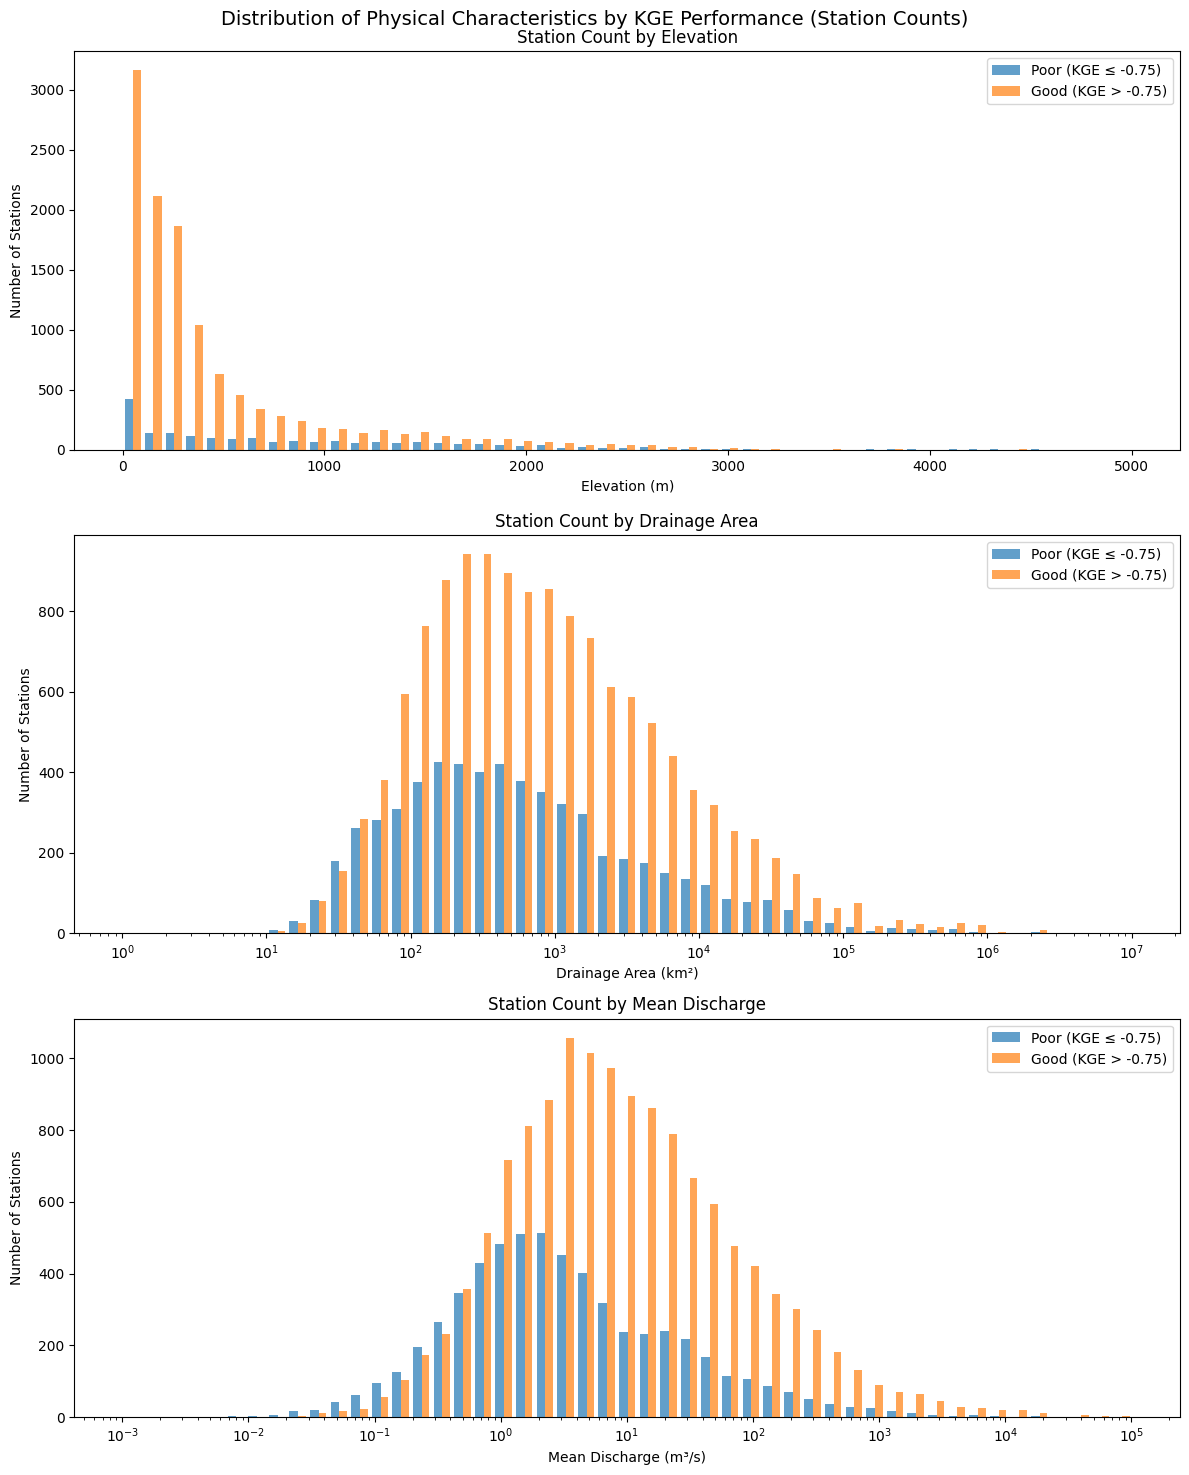

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Split data based on KGE threshold
data_poor = data[data['kge_sim'] <= -0.75]
data_other = data[data['kge_sim'] > -0.75]

def plot_station_distributions(data_poor, data_other):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    fig.suptitle('Distribution of Physical Characteristics by KGE Performance (Station Counts)', fontsize=14)
    
    # Elevation Distribution
    bins = np.linspace(0, 5000, 50)  # Creating 50 equal-width bins from 0 to 5000m
    ax1.hist([data_poor['elevation_m'], data_other['elevation_m']], 
             bins=bins, label=['Poor (KGE ≤ -0.75)', 'Good (KGE > -0.75)'],
             alpha=0.7)
    ax1.set_title('Station Count by Elevation')
    ax1.set_xlabel('Elevation (m)')
    ax1.set_ylabel('Number of Stations')
    ax1.legend()

    # Drainage Area Distribution (using logarithmic bins)
    log_bins = np.logspace(0, 7, 50)  # Creating 50 logarithmic bins from 10^0 to 10^7
    ax2.hist([data_poor['DSContArea(km2)'], data_other['DSContArea(km2)']],
             bins=log_bins, label=['Poor (KGE ≤ -0.75)', 'Good (KGE > -0.75)'],
             alpha=0.7)
    ax2.set_xscale('log')
    ax2.set_title('Station Count by Drainage Area')
    ax2.set_xlabel('Drainage Area (km²)')
    ax2.set_ylabel('Number of Stations')
    ax2.legend()

    # Mean Discharge Distribution (using logarithmic bins)
    discharge_bins = np.logspace(-3, 5, 50)  # Creating 50 logarithmic bins from 10^-3 to 10^5
    ax3.hist([data_poor['mean_obs_QM'], data_other['mean_obs_QM']],
             bins=discharge_bins, label=['Poor (KGE ≤ -0.75)', 'Good (KGE > -0.75)'],
             alpha=0.7)
    ax3.set_xscale('log')
    ax3.set_title('Station Count by Mean Discharge')
    ax3.set_xlabel('Mean Discharge (m³/s)')
    ax3.set_ylabel('Number of Stations')
    ax3.legend()

    plt.tight_layout()
    
    # Print summary statistics for each characteristic
    print("\nDistribution Summary:")
    for group_name, group_data in [('Poor Performance', data_poor), 
                                 ('Good Performance', data_other)]:
        print(f"\n{group_name}:")
        print(f"Total number of stations: {len(group_data)}")
        print(f"Elevation (m) - Mean: {group_data['elevation_m'].mean():.1f}, Median: {group_data['elevation_m'].median():.1f}")
        print(f"Drainage Area (km²) - Mean: {group_data['DSContArea(km2)'].mean():.1f}, Median: {group_data['DSContArea(km2)'].median():.1f}")
        print(f"Mean Discharge (m³/s) - Mean: {group_data['mean_obs_QM'].mean():.1f}, Median: {group_data['mean_obs_QM'].median():.1f}")

# Run the analysis
plot_station_distributions(data_poor, data_other)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



Density Distribution Summary:

Note about density values:
- Density values represent the relative likelihood of observations
- The total area under each density curve equals 1
- Higher density values indicate more concentrated observations in that range

Poor Performance Statistics:
Total number of stations: 5955
Elevation (m) - Mean: 867.2, Median: 614.0
Drainage Area (km²) - Mean: 9140.9, Median: 428.7
Mean Discharge (m³/s) - Mean: 49.3, Median: 2.4

Good Performance Statistics:
Total number of stations: 13235
Elevation (m) - Mean: 456.2, Median: 237.0
Drainage Area (km²) - Mean: 12076.4, Median: 665.3
Mean Discharge (m³/s) - Mean: 207.9, Median: 7.3


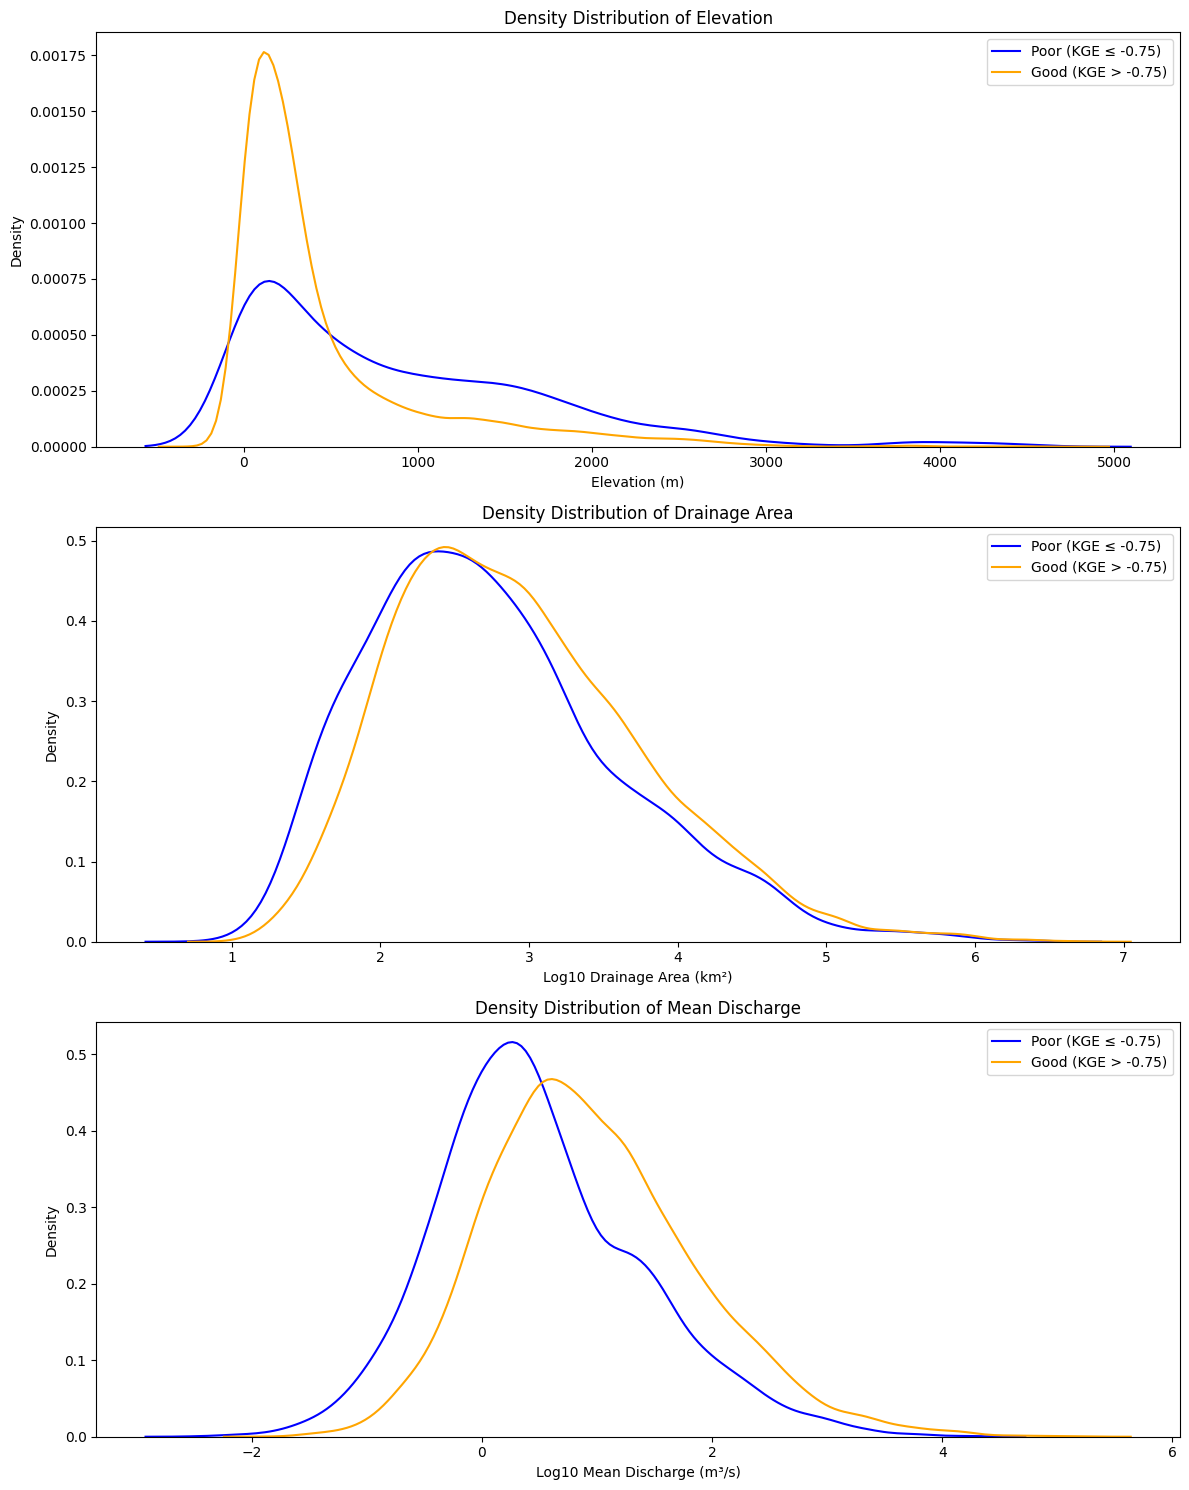

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split data based on KGE threshold
data_poor = data[data['kge_sim'] <= -0.75]
data_other = data[data['kge_sim'] > -0.75]

def plot_density_distributions(data_poor, data_other):
    # Create three subplots vertically arranged
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    #fig.suptitle('Distribution of Physical Characteristics by KGE Performance (Density)', fontsize=14)
    
    # Elevation Distribution
    # Using KDE (Kernel Density Estimation) to show probability density
    sns.kdeplot(data=data_poor['elevation_m'], ax=ax1, label='Poor (KGE ≤ -0.75)', color='blue')
    sns.kdeplot(data=data_other['elevation_m'], ax=ax1, label='Good (KGE > -0.75)', color='orange')
    ax1.set_title('Density Distribution of Elevation')
    ax1.set_xlabel('Elevation (m)')
    ax1.set_ylabel('Density')
    ax1.legend()

    # Drainage Area Distribution (using log scale)
    # Transform data to log10 for better visualization
    sns.kdeplot(data=np.log10(data_poor['DSContArea(km2)']), ax=ax2, label='Poor (KGE ≤ -0.75)', color='blue')
    sns.kdeplot(data=np.log10(data_other['DSContArea(km2)']), ax=ax2, label='Good (KGE > -0.75)', color='orange')
    ax2.set_title('Density Distribution of Drainage Area')
    ax2.set_xlabel('Log10 Drainage Area (km²)')
    ax2.set_ylabel('Density')
    ax2.legend()

    # Mean Discharge Distribution (using log scale)
    # Transform data to log10 for better visualization
    sns.kdeplot(data=np.log10(data_poor['mean_obs_QM']), ax=ax3, label='Poor (KGE ≤ -0.75)', color='blue')
    sns.kdeplot(data=np.log10(data_other['mean_obs_QM']), ax=ax3, label='Good (KGE > -0.75)', color='orange')
    ax3.set_title('Density Distribution of Mean Discharge')
    ax3.set_xlabel('Log10 Mean Discharge (m³/s)')
    ax3.set_ylabel('Density')
    ax3.legend()

    plt.tight_layout()
    
    # Print summary statistics and explanation of density
    print("\nDensity Distribution Summary:")
    print("\nNote about density values:")
    print("- Density values represent the relative likelihood of observations")
    print("- The total area under each density curve equals 1")
    print("- Higher density values indicate more concentrated observations in that range")
    
    for group_name, group_data in [('Poor Performance', data_poor), 
                                 ('Good Performance', data_other)]:
        print(f"\n{group_name} Statistics:")
        print(f"Total number of stations: {len(group_data)}")
        print(f"Elevation (m) - Mean: {group_data['elevation_m'].mean():.1f}, Median: {group_data['elevation_m'].median():.1f}")
        print(f"Drainage Area (km²) - Mean: {group_data['DSContArea(km2)'].mean():.1f}, Median: {group_data['DSContArea(km2)'].median():.1f}")
        print(f"Mean Discharge (m³/s) - Mean: {group_data['mean_obs_QM'].mean():.1f}, Median: {group_data['mean_obs_QM'].median():.1f}")

# Run the analysis
plot_density_distributions(data_poor, data_other)
plt.savefig('/Users/yubin/Library/CloudStorage/Box-Box/master thesis and what not/Thesis/plot/Density Distribution of Physical Characteristics by KGE Performance.png', dpi=1200, bbox_inches='tight')
plt.show()